# Hello again, welcome to notebook 4!

We are going to be looking at:
* Representing words as vectors
* Measuring the distances between words using cosine similarity
* Visualizing word embeddings using UMAP
* The Gensim library

It is recommended that you complete all exercises that are not marked as optional.

Feel free to be creative and write your own code wherever you want!

The provided functions are only there to help you if you get stuck :)

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm
from numpy.linalg import norm
import umap
import plotly.express as px

import gensim.downloader as api
from gensim.models.keyedvectors import Word2VecKeyedVectors

## Lesson 1: Words as vectors

It is useful to represent words as vectors, as it allows us to calculate similarities between words. In a future notebook you'll see that by extension that allows us to calculate similarities between sentences, which is exactly what we might need to detect sarcasm!

Learning a good representation is a difficult task, but we can think about what we might want with an example.

Consider the sentence 'I have a pet X'.

<img src=images/dog_and_cat.jpg width="400">

What would you guess is a good choice for X?
Perhaps the most likely choices are 'dog' and 'cat',
although other options are possible too. 

If 'dog' is always a good guess for filling a blank word when 'cat' is a good choice, then we see that the words 'dog' and 'cat' must always appear in similar contexts.

This helps motivates what a good model should do; words with similar contexts should have similar representations.

Instead of training our own model, which can be very expensive and take several hours, we are going to be downloading preexisting word vectors from the model Word2Vec.

Word2Vec uses a neural network to learn the relationships between words from a large corpus of text (such as Wikipedia). We won't go into any more detail here, but if you're interested in learning more, here are some resources:
* An introduction to neural networks: https://www.youtube.com/watch?v=aircAruvnKk
* An article about Word2Vec: https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314

In the cells below, we load pretrained Word2Vec vectors. You only need to load the commented cell once.

In [32]:
# model = api.load('word2vec-google-news-300')
# os.makedirs('models')
# model.save("./models/word2vec.model")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [2]:
os.listdir('models')  # Sanity check

['word2vec.model', 'word2vec.model.vectors.npy']

In [2]:
model = Word2VecKeyedVectors.load("./models/word2vec.model")
word_vectors = {w: model[w] for w in model.vocab}

## Lesson 2: Cosine similarity

The cosine similarity is a measure of similarity between two non-zero vectors. Given vectors $u$ and $v$ it is defined as 

$ cos(\theta) = \frac{u \cdot v}{\| u\| \| v\|} $

This metric will allow us to discern how similar two words are by comparing their vector representations.

<img src=images/cosine.png width="400">

### Exercise 2: Coding up cosine similarity

Your task is to code up the cosine similarity, verifying your answer on a few test inputs.

In [3]:
def cosine_similarity(u, v):
    return((np.dot(v,u)/(np.linalg.norm(u)*np.linalg.norm(v))))


In [4]:
def test_cosine_similarity(test_inputs, tol=1e-6):
    for i, (u, v, sim) in enumerate(test_inputs):
        your_sim = cosine_similarity(u, v)
        
        if abs(your_sim - sim) < tol:
            print(f'Congratulations! You passed test {i+1}', end=' ')
        else:
            print(f'Unlucky... You failed test {i+1}', end=' ')
        print(f'(u={u}, v={v}, sim={sim}, your_sim={your_sim})')

test_inputs = [
    ([1], [1], 1.0), 
    ([1, 0], [0, 1], 0.0), 
    ([3, 4], [4, 3], 0.96)
]
test_cosine_similarity(test_inputs)

Congratulations! You passed test 1 (u=[1], v=[1], sim=1.0, your_sim=1.0)
Congratulations! You passed test 2 (u=[1, 0], v=[0, 1], sim=0.0, your_sim=0.0)
Congratulations! You passed test 3 (u=[3, 4], v=[4, 3], sim=0.96, your_sim=0.96)


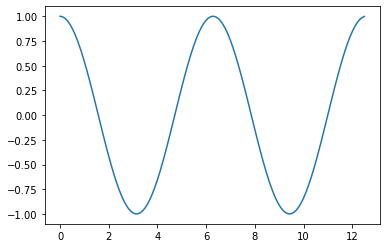

In [5]:
# Q1.2 - What are the bounds on the cosine similarity?
# 1 and -1 are the bounds because of the cosine graph:
import matplotlib.pyplot as plt

x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.cos(x)

plt.plot(x,y)
plt.show()

In [1]:
# Q1.3 - Find two 2D vectors which have maximum cosine similarity
#      - What do they look like geometrically?
print(cosine_similarity([1,0],[0,1]))

plt.quiver(0,0, [0,1],[1,0],scale=5)
plt.show()

NameError: name 'cosine_similarity' is not defined

1.0


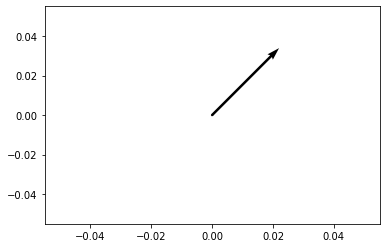

In [28]:
# Q1.4 - Find two 2D vectors which have minimum cosine similarity
#      - What do they look like geometrically?
print(cosine_similarity([0,1],[0,1]))

plt.quiver(0,0, [0,1],[0,1],scale=5)
plt.show()

1.0


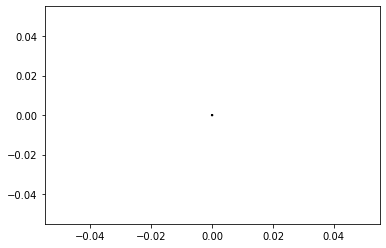

In [29]:
# Q1.5 - Why must be the vectors be non-zero?
#      - Does this align with your geometric intuition?
#If the vectors are 0, then they dont exist.
print(cosine_similarity([0,1],[0,1]))

plt.quiver(0,0, [0,0],[0,0],scale=5)
plt.show()

## Lesson 3: Applying cosine similarity

Now that we have a metric, let's try to write a similarity function.

Given a root word, we want to find all words that are similar to it.

In [22]:
def print_similar_words(root_vector, word_vectors, threshold=0.67):
    for word, vector in word_vectors.items():
        similarity = cosine_similarity(root_vector, vector)
        if similarity > threshold:
            print(f'{word}: {similarity:.2f}')
    
print_similar_words(word_vectors['england'], word_vectors)

england: 1.00
chelsea: 0.71
liverpool: 0.72


KeyboardInterrupt: 

### Exercise 3.1: Exploring word vectors

In [32]:
# Q3.1 - Try running `print_similar_words` for the rodents ['mouse', 'rat']
#      - What differences can you see between the similar words for each animal?
#      - Does this surprise you?

mouse: 1.00


In [7]:
for rodent in ['mouse', 'rat']:
    print('*'*10)
    print(rodent)
    print('*'*10)
    print_similar_words(word_vectors[rodent], word_vectors, threshold=0.56)

**********
mouse
**********
mice: 0.59
mouse: 1.00
cordless_laser: 0.57
Logitech_MX_Revolution: 0.62
VX_Nano: 0.56
Logitech_MX###: 0.56
Razer_Mamba: 0.60
**********
rat
**********
rats: 0.69
snake: 0.56
rat: 1.00
rabbit: 0.56
rodents: 0.62
rodent: 0.69
cockroaches: 0.59
cockroach: 0.59


KeyboardInterrupt: 

In [27]:
# Q2.2 - In this question we'll learn about relationships captured by the data
#      - Get 3 vectors p='paris', f='france' and s='spain'
#      - Create a new vector p - f + s
#      - Find the closest words to this vector (HINT: try a threshold of 0.5)
#      - What do you see?
#      - Does this work for countries other than 'spain'?
#      - Does this work for pairs other than 'paris' and 'france'?

p = (word_vectors['paris'])
f = (word_vectors['france'])
s = (word_vectors['spain'])
newVec = p - f + s
print(newVec)


[-2.27050781e-01 -3.58886719e-02 -5.63964844e-02  4.05273438e-01
 -1.83349609e-01  2.71484375e-01  2.14843750e-02 -1.75781250e-01
 -3.27148438e-01  2.45918274e-01 -1.55273438e-01 -4.46289062e-01
 -5.37109375e-03  2.13623047e-01 -1.19384766e-01 -3.90625000e-03
  2.92968750e-03 -5.93261719e-02 -1.24023438e-01  4.21386719e-01
 -3.27148438e-01 -3.01757812e-01  2.08984375e-01  4.86328125e-01
 -4.10156250e-02 -8.69140625e-02  1.67236328e-02  2.00927734e-01
 -1.04980469e-01 -2.97363281e-01 -2.10693359e-01 -3.13964844e-01
 -6.39648438e-02 -8.49609375e-02 -1.45263672e-01  1.80664062e-02
 -3.36181641e-01  1.29821777e-01 -1.12548828e-01 -5.37109375e-03
 -1.81335449e-01 -2.39013672e-01  4.37500000e-01  4.55078125e-01
  5.09765625e-01 -2.66113281e-02  1.19140625e-01 -2.02148438e-01
 -3.36914062e-01  3.54492188e-01  3.73535156e-02  5.95703125e-01
 -1.12426758e-01 -1.23046875e-01 -1.49414062e-01  5.81054688e-02
  2.63671875e-02  5.48095703e-02  8.49609375e-02 -4.31152344e-01
  1.87500000e-01  2.39746

## Lesson 4: UMAP

UMAP is a dimension-reduction technique that can be used for visualization.

Given a set of vectors, it can embed them such that similar vectors lie close together.

It can accept multiple metrics but we are going to use the cosine distance.

Note: If you get an error when running `plot_words` then you probably need to given it more words.

In [40]:
def plot_words(words, word_vectors, labels=None, metric='cosine'):
    
    # Embed the words into 2d using UMAP with the given metric
    reducer = umap.UMAP(metric=metric)
    embedding = reducer.fit_transform([word_vectors[w] for w in words])
    
    # Create a DataFrame (it is required for px.scatter)
    df = pd.DataFrame()
    df['x'] = embedding[:, 0]
    df['y'] = embedding[:, 1]
    df['word'] = words
    df['label'] = labels if labels else None
    
    # Create an interactive scatter plot, with colours given by the labels
    color = 'label' if labels else None
    fig = px.scatter(df, 
                     x='x',
                     y='y', 
                     color=color,
                     hover_data=['word'])
    fig.show()

### Exercise 4: Visualizing word vectors

In [41]:
# Q4.1 - Run the code below
#      - Are the clusters what you expect?
#      - Are similar words within clusters close to each other?

words = ['siamese', 'persian', 'labrador', 'poodle', 'cheetah', 'lion',
         'black', 'white', 'orange', 'yellow', 'red', 'purple',
         'sad', 'unhappy', 'joyful', 'happy', 'angry', 'furious']
labels = [str(i//6) for i in range(len(words))]
plot_words(words, word_vectors, labels)

In [49]:
# Q4.2 - Run the code below
#      - Where is the word 'mouse'?
#      - Try to think of other words that belong to 2 categories.
#      - Where do they end up when you plot them?

words = ['computer', 'desktop', 'printer', 'keyboard', 'screen', 'dpi', 'desk', 'laptop', 'webcam', 'microsoft',
         'rat', 'hamster', 'gerbil', 'capybara', 'porcupine', 'chinchilla', 'marmot', 'gopher', 'beaver', 'squirrel',
         'mouse']
labels = [str(i//10) for i in range(20)] + [2]
plot_words(words, word_vectors, labels)

## Lesson 5: The Gensim library
Gensim is one of the most widely used and important Python modules for NLP. It has many of the models and methods that we will want to look at already implemented, including the cosine similarity.

We used it above already to load our word2vec vectors. In this lesson, we will show how it can be used to calculate the cosine similarity, rather than doing this by hand!

To begin with, let's normalise all of the vectors in the model. One reason we might do this is so that the cosine similarity is reduced to the dot product, which can be computationally beneficial:

$ cos(\theta) = \frac{u \cdot v}{\| u\| \| v\|} = u \cdot v $

In [42]:
model.init_sims(replace=True)

Now we are quiclkly able to find similar words, just like we did above. We can search by word...

In [43]:
model.similar_by_word('england')

[('liverpool', 0.7172455787658691),
 ('chelsea', 0.7060471177101135),
 ('fulham', 0.7020782232284546),
 ('tottenham', 0.6907042264938354),
 ('rooney', 0.6863133907318115),
 ('man_utd', 0.6844729781150818),
 ('torres', 0.6763710379600525),
 ('ronaldo', 0.6757339239120483),
 ('spain', 0.6740613579750061),
 ('gerrard', 0.6709045171737671)]

... or search by vector.

In [44]:
model.most_similar(positive=['paris', 'spain'], negative=['france'])

[('madrid', 0.5295541286468506),
 ('dubai', 0.509259819984436),
 ('heidi', 0.48901546001434326),
 ('portugal', 0.48763689398765564),
 ('paula', 0.4855714440345764),
 ('alex', 0.480734646320343),
 ('lohan', 0.4801103472709656),
 ('diego', 0.48010098934173584),
 ('florence', 0.47695302963256836),
 ('costa', 0.4761490225791931)]

### Exercise 4: Comparing methods

In [45]:
# Q4.1 - Compare the results of the print_similar_words function above, and the Gensim one (.similar_by_word).
#      - Are the outputs the same? Is this what you would expect?
print_similar_words(word_vector['google'],word_vectors)
model.similar_by_word("google")

NameError: name 'word_vector' is not defined